In [1]:
import numpy as np
# from keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import datasets, layers, models

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
# (x_train_load, y_train_load), (x_test_load, y_test_load) = datasets.cifar10.load_data()
(x_train_load, y_train_load), (x_test_load, y_test_load) = cifar10.load_data()

# 處理數據
x_train_load = x_train_load[:500]
y_train_load = y_train_load[:500]

x_test_load = x_test_load[:20]
y_test_load = y_test_load[:20]

print(x_test_load.shape)
print(y_test_load)

(20, 32, 32, 3)
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]
 [0]
 [9]
 [5]
 [7]
 [9]
 [8]
 [5]
 [7]
 [8]
 [6]]


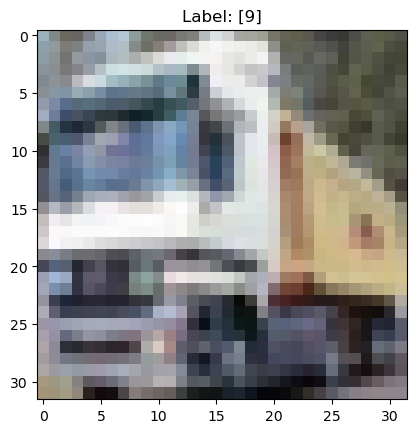

In [4]:
plt.imshow(x_train_load[1])
plt.title(f'Label: {y_train_load[1]}')
plt.show()
 

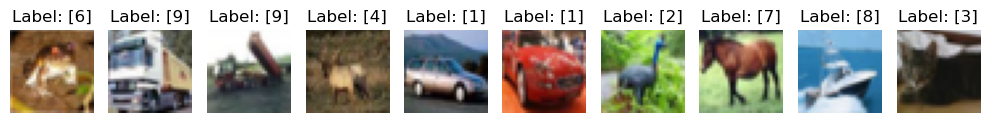

In [6]:
# 使用 matplotlib 顯示多張圖像
# 設置圖像數量
num_images = 10

# 創建一個圖形和一組子圖
fig, axes = plt.subplots(1, num_images, figsize=(10, 10))

for i, ax in enumerate(axes):
    # 顯示第 i 張圖像
    ax.imshow(x_train_load[i])
    ax.set_title(f'Label: {y_train_load[i]}')
    ax.axis('off')  # 不顯示軸

plt.tight_layout()
plt.show()

In [10]:
print(x_test_load.shape)
x_test_load[1]

(20, 32, 32, 3)


array([[[235, 235, 235],
        [231, 231, 231],
        [232, 232, 232],
        ...,
        [233, 233, 233],
        [233, 233, 233],
        [232, 232, 232]],

       [[238, 238, 238],
        [235, 235, 235],
        [235, 235, 235],
        ...,
        [236, 236, 236],
        [236, 236, 236],
        [235, 235, 235]],

       [[237, 237, 237],
        [234, 234, 234],
        [234, 234, 234],
        ...,
        [235, 235, 235],
        [235, 235, 235],
        [234, 234, 234]],

       ...,

       [[ 87,  99,  89],
        [ 43,  51,  37],
        [ 19,  23,  11],
        ...,
        [169, 184, 179],
        [182, 197, 193],
        [188, 202, 201]],

       [[ 82,  96,  82],
        [ 46,  57,  36],
        [ 36,  44,  22],
        ...,
        [174, 189, 183],
        [185, 200, 196],
        [187, 202, 200]],

       [[ 85, 101,  83],
        [ 62,  75,  48],
        [ 58,  67,  38],
        ...,
        [168, 183, 178],
        [180, 195, 191],
        [186, 200, 199]]

## Image data format
  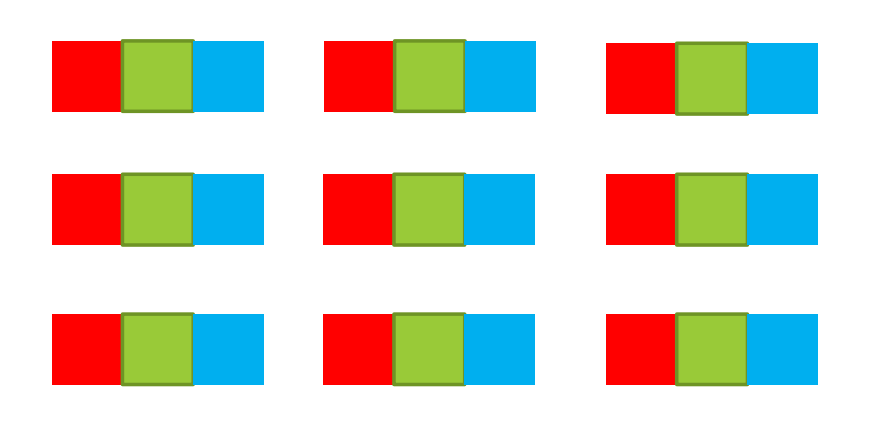
  ### [ [ [R,G,B], [R,G,B], [R,G,B] ],  
###   [ [R,G,B], [R,G,B], [R,G,B] ],
###   [ [R,G,B], [R,G,B], [R,G,B] ] ] 